In [1]:
# outliers values (one dimension)
from sklearn.datasets import load_boston

boston = load_boston()

continuous_variables = [n for n in range(boston.data.shape[1]) if n != 3]
print(continuous_variables)

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [2]:
import numpy as np
from sklearn import preprocessing

normalize_data = preprocessing.StandardScaler().fit_transform(
    boston.data[:, continuous_variables]
)
ouliers_rows, outliter_columns = np.where(np.abs(normalize_data) > 3)
print(ouliers_rows)
print(outliter_columns)

[ 55  56  57 102 141 199 200 201 202 203 204 225 256 257 262 283 284 347
 351 352 353 353 354 355 364 365 367 373 374 374 380 398 404 405 406 410
 410 411 412 412 414 414 415 416 418 418 419 423 424 425 426 427 427 429
 431 436 437 438 445 450 454 455 456 457 466]
[ 1  1  1 10 11  1  1  1  1  1  1  4  1  4  4  1  1  1  6  6  1  6  6  6
  4  4  4 11  4 11  0  0  0  0  4  0 10 10 10 11  0 11 10 10  0 10 10 10
 10 10 10  0 10 10 10 10 10 10 10 10 10 10 10 10 10]


In [3]:
print(list(zip(ouliers_rows, outliter_columns)))

[(55, 1), (56, 1), (57, 1), (102, 10), (141, 11), (199, 1), (200, 1), (201, 1), (202, 1), (203, 1), (204, 1), (225, 4), (256, 1), (257, 4), (262, 4), (283, 1), (284, 1), (347, 1), (351, 6), (352, 6), (353, 1), (353, 6), (354, 6), (355, 6), (364, 4), (365, 4), (367, 4), (373, 11), (374, 4), (374, 11), (380, 0), (398, 0), (404, 0), (405, 0), (406, 4), (410, 0), (410, 10), (411, 10), (412, 10), (412, 11), (414, 0), (414, 11), (415, 10), (416, 10), (418, 0), (418, 10), (419, 10), (423, 10), (424, 10), (425, 10), (426, 10), (427, 0), (427, 10), (429, 10), (431, 10), (436, 10), (437, 10), (438, 10), (445, 10), (450, 10), (454, 10), (455, 10), (456, 10), (457, 10), (466, 10)]


In [4]:
# EllipticEcvelop distribution
from sklearn.datasets import make_blobs
from sklearn.covariance import EllipticEnvelope
from matplotlib import pyplot as plt


def generate_distribiution(blobs):
    blob = make_blobs(
        n_samples=100,
        n_features=2,
        centers=blobs,
        cluster_std=1.5,
        shuffle=True,
        random_state=5,
    )

    robust_covariance_est = EllipticEnvelope(contamination=0.1).fit(
        blob[0]
    )  # contamination -- percentage of outliers
    detection = robust_covariance_est.predict(blob[0])
    outliers = np.where(detection == -1)[0]
    inliers = np.where(detection == 1)[0]

    plt.scatter(
        blob[0][:, 0],
        blob[0][:, 1],
        c="blue",
        alpha=0.8,
        s=60,
        marker="o",
        edgecolors="white",
    )
    plt.show()
    return (outliers, inliers, blob)

In [5]:
# EllipticEcvelop distribution and outliers
def plot_outliers(outliers, inliers, blob):
    in_points = plt.scatter(
        blob[0][inliers, 0],
        blob[0][inliers, 1],
        c="blue",
        alpha=0.8,
        s=60,
        marker="o",
        edgecolors="white",
    )
    out_points = plt.scatter(
        blob[0][outliers, 0],
        blob[0][outliers, 1],
        c="red",
        alpha=0.8,
        s=60,
        marker="o",
        edgecolors="white",
    )
    plt.legend(
        (in_points, out_points),
        ("Typical", "Outliners"),
        scatterpoints=1,
        loc="lower right",
    )
    plt.show()

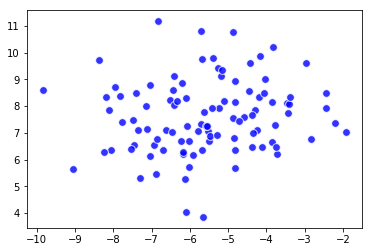

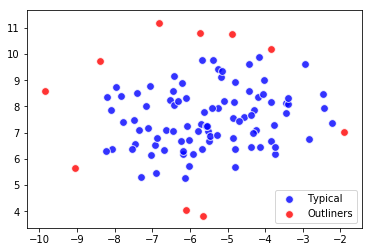

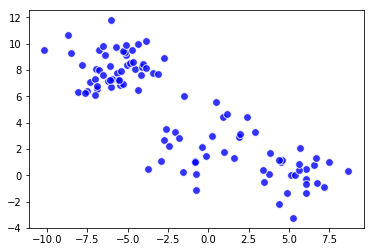

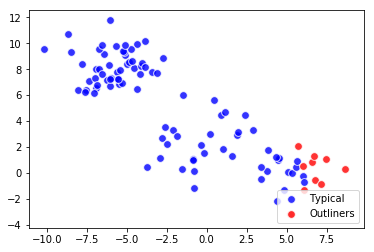

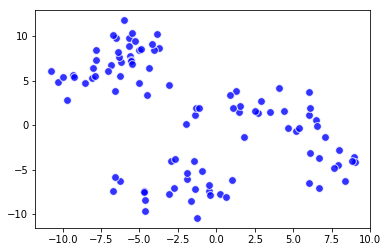

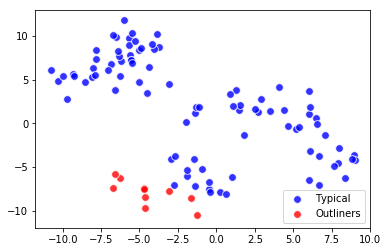

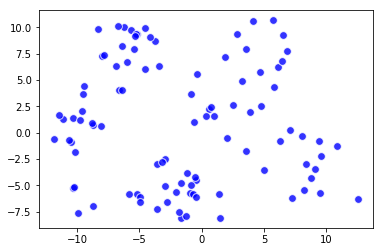

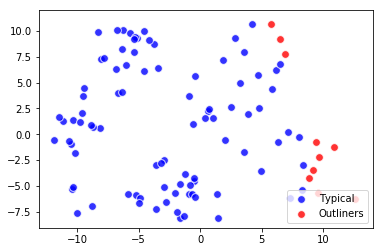

In [6]:
plot_outliers(*generate_distribiution(1))
plot_outliers(
    *generate_distribiution(4)
)  # algorithm doesn't work well for more than one blob (more clasters)
plot_outliers(
    *generate_distribiution(8)
)  # it will onlu show outliers data in one, smallest cluster
plot_outliers(*generate_distribiution(24))

In [11]:
from sklearn.decomposition import PCA

boston = load_boston()
# outliers in boston data 1
continuous_variables = [n for n in range(boston.data.shape[1]) if n != 3]
normalized_data = preprocessing.StandardScaler().fit_transform(
    boston.data[:, continuous_variables]
)
pca = PCA(n_components=2)
Zscore_components = pca.fit_transform(normalize_data)
vtot = "The variance explained " + str(round(np.sum(pca.explained_variance_ratio_), 3))
v1 = str(round(np.sum(pca.explained_variance_ratio_[0]), 3))
v2 = str(round(np.sum(pca.explained_variance_ratio_[1]), 3))

In [12]:
# outliers in boston data 2
robust_covariance_est = EllipticEnvelope(
    store_precision=False, assume_centered=False, contamination=0.05
)
robust_covariance_est.fit(normalized_data)
detection = robust_covariance_est.predict(normalized_data)
outliers = np.where(detection == -1)
regular = np.where(detection == 1)

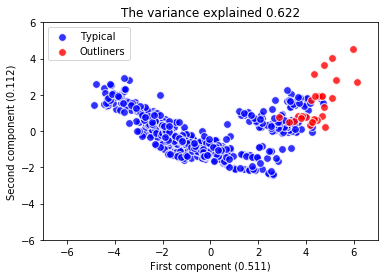

In [13]:
# outliers in boston data 3
#
from matplotlib import pyplot as plt

in_points = plt.scatter(
    Zscore_components[regular, 0],
    Zscore_components[regular, 1],
    color="blue",
    alpha=0.8,
    s=60,
    marker="o",
    edgecolors="white",
)
out_points = plt.scatter(
    Zscore_components[outliers, 0],
    Zscore_components[outliers, 1],
    color="red",
    alpha=0.8,
    s=60,
    marker="o",
    edgecolors="white",
)

plt.legend(
    (in_points, out_points), ("Typical", "Outliners"), scatterpoints=1, loc="best"
)
plt.xlabel("First component (%s)" % v1)
plt.ylabel("Second component (%s)" % v2)
plt.xlim([-7, 7])
plt.ylim([-6, 6])
plt.title(
    vtot
)  # EllipticEnvelope only shows outliers data in the one, smallest cluster
plt.show()